In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [5]:
import zipfile as zf

files = zf.ZipFile("Flowers-Dataset.zip",'r')
files.extractall()
files.close()

In [6]:
cd D:\New folder

D:\New folder


In [7]:
ls

 Volume in drive D is Work
 Volume Serial Number is 227B-6FDB

 Directory of D:\New folder

07-10-2022  15:51    <DIR>          .
07-10-2022  15:51    <DIR>          ..
07-10-2022  15:39    <DIR>          data
07-10-2022  15:51        37,110,944 flowers.h5
07-10-2022  09:28       235,663,188 Flowers-Dataset.zip
               2 File(s)    272,774,132 bytes
               3 Dir(s)  499,458,633,728 bytes free


In [8]:
import glob
import zipfile

In [9]:
files = glob.glob('Flowers-Dataset.zip')

In [10]:
files

['Flowers-Dataset.zip']

In [11]:
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('data/raw')

Unzipping: Flowers-Dataset.zip


In [12]:
file

'Flowers-Dataset.zip'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen= ImageDataGenerator(rescale=1./255,zoom_range = 0.2,horizontal_flip =True,vertical_flip =False)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
x_train = train = train_datagen.flow_from_directory(r'D:\New folder\data\raw\flowers\daisy',target_size = (10,10),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [18]:
x_test = test_datagen.flow_from_directory(r'D:\New folder\data\raw\flowers\dandelion',target_size = (1,5),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [19]:
x_train.class_indices

{}

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [22]:
model= Sequential()

In [23]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu')) 

In [24]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [27]:
32*(3*3*3+1)

896

In [28]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150,activation ='relu'))

In [29]:
model.add(Dense(4,activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [31]:
len(x_train)

0

In [32]:
1238/24

51.583333333333336

In [33]:
len(x_test)

0

In [34]:
326/24

13.583333333333334

In [35]:
ls

 Volume in drive D is Work
 Volume Serial Number is 227B-6FDB

 Directory of D:\New folder

07-10-2022  15:51    <DIR>          .
07-10-2022  15:51    <DIR>          ..
07-10-2022  15:39    <DIR>          data
07-10-2022  15:51        37,110,944 flowers.h5
07-10-2022  09:28       235,663,188 Flowers-Dataset.zip
               2 File(s)    272,774,132 bytes
               3 Dir(s)  499,458,633,728 bytes free


In [36]:
model.save('flower.h5')

In [37]:
ls

 Volume in drive D is Work
 Volume Serial Number is 227B-6FDB

 Directory of D:\New folder

07-10-2022  18:30    <DIR>          .
07-10-2022  18:30    <DIR>          ..
07-10-2022  15:39    <DIR>          data
07-10-2022  18:30        37,110,944 flower.h5
07-10-2022  15:51        37,110,944 flowers.h5
07-10-2022  09:28       235,663,188 Flowers-Dataset.zip
               3 File(s)    309,885,076 bytes
               3 Dir(s)  499,421,519,872 bytes free


In [38]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
odel = load_model('flower.h5')

In [40]:
pwd

'D:\\New folder'

In [41]:
img = image.load_img(r'D:\New folder\data\raw\flowers\daisy\134409839_71069a95d1_m.jpg')

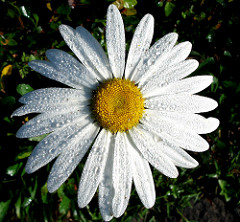

In [42]:
img

In [43]:
img = image.load_img(r'D:\New folder\data\raw\flowers\daisy\134409839_71069a95d1_m.jpg',target_size=(64,64))

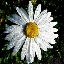

In [44]:
img

In [45]:
x=image.img_to_array(img)

In [46]:
x

array([[[ 0.,  3.,  0.],
        [ 5., 15.,  6.],
        [ 1.,  9.,  0.],
        ...,
        [44., 51.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 6.,  7.,  1.],
        [ 5.,  5.,  7.],
        [ 1.,  5.,  8.],
        ...,
        [ 7.,  3.,  4.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  2.]],

       [[ 2.,  4.,  1.],
        [ 7.,  0.,  1.],
        [ 5., 11.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[25., 77., 11.],
        [ 9., 35.,  0.],
        [ 6.,  1.,  8.],
        ...,
        [13., 13., 11.],
        [ 1.,  1.,  3.],
        [27., 28., 23.]],

       [[43., 88., 33.],
        [ 2.,  0.,  1.],
        [ 3.,  1.,  6.],
        ...,
        [15., 15., 13.],
        [ 0.,  0.,  0.],
        [ 3.,  3.,  1.]],

       [[10., 39.,  8.],
        [ 0.,  0.,  2.],
        [ 6.,  8.,  3.],
        ...,
        [16., 18., 15.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  6.]]

In [47]:
x.shape

(64, 64, 3)

In [48]:
x=np.expand_dims(x,axis=0)

In [49]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 328ms/step


In [50]:
y

array([1], dtype=int64)

In [51]:
x_train.class_indices

{}

In [52]:
index = ['daisy','dandelion','rose','sunflower','tulip']

In [53]:
index[y[0]]

'dandelion'

In [54]:
index[3]

'sunflower'